###  Conditional Flow-Matching: EMNIST $\to$ Digits-MNIST

In [1]:
from DynGenModels.configs.registered_experiments import Config_MNIST_UNet_CondFlowMatch as Config

config = Config(NAME = 'emnist_to_mnist',
                DATA_SOURCE = 'emnist',
                DATA_TARGET = 'mnist',
                DATA_SPLIT_FRACS = [1.0, 0.0, 0.0],
                BATCH_SIZE = 128,
                EPOCHS = 20,
                LR = 1e-4,
                DIM_HIDDEN = 32, 
                DYNAMICS = 'OptimalTransportFlowMatching',
                SIGMA = 0.0,
                SOLVER ='dopri5',
                ATOL = 1e-4,
                RTOL = 1e-4,
                NUM_SAMPLING_STEPS = 100,
                DEVICE = 'cuda:1')

#...set working directory for results:

config.set_workdir(path='../../results', save_config=True)

#=========================================================================================================
INFO: created directory: ../../results/emnist_to_mnist.OptimalTransportFlowMatching.Unet.2024.02.13_17h02
#=========================================================================================================
+---------------------+------------------------------+
| Parameters          | Values                       |
+---------------------+------------------------------+
| NAME                | emnist_to_mnist              |
| DATA_SOURCE         | emnist                       |
| DATA_TARGET         | mnist                        |
| DIM_INPUT           | 784                          |
| INPUT_SHAPE         | (1, 28, 28)                  |
| DEVICE              | cuda:1                       |
| OPTIMIZER           | Adam                         |
| LR                  | 0.0001                       |
| WEIGHT_DECAY        | 0.0                          |
| OPTIMIZER_BETAS   

In [3]:
from DynGenModels.models.dynamical_model import Model
from DynGenModels.datamodules.mnist.datasets import MNISTDataset 
from DynGenModels.datamodules.mnist.dataloader import MNISTDataloader
from DynGenModels.dynamics.cnf.condflowmatch import OptimalTransportFlowMatching 
from DynGenModels.models.architectures.unet import Unet 

mnist = MNISTDataset(config)

cfm = Model(dynamics = OptimalTransportFlowMatching(config), 
            model = Unet(config),
            dataloader = MNISTDataloader(mnist, config), 
            config = config)

cfm.train()

number of training parameters: 1075361
start training...


INFO: building dataloaders...
INFO: train/val/test split ratios: 1.0/0.0/0.0
INFO: train size: 60000, validation size: 0, testing sizes: 0


epochs:   0%|          | 0/20 [00:00<?, ?it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([1

### generate data from trained model:

generate mnist samples by evolving fashion-mnist input

In [ ]:
import torch
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 

pipeline = FlowMatchPipeline(trained_model=cfm, 
                             num_sampling_steps=300,
                             configs=config)

pipeline.generate_samples(input_source=torch.cat(mnist.source, dim=0)[:100].unsqueeze(1))

### Display results

tensor([3, 7, 6, 4, 8, 5, 6, 2, 1, 8, 8, 8, 9, 6, 1, 0, 8, 5, 0, 6])

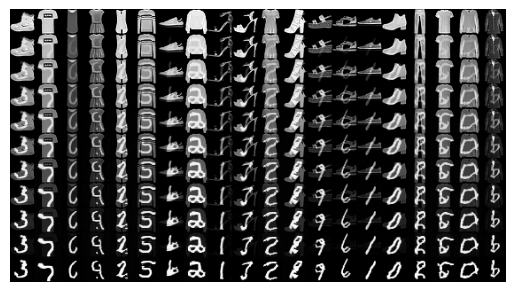

In [77]:
import torch
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage

def plot_image_evolution(pipeline, num_time_steps, nrow=10):
    step_list = [i for i in range(0, num_time_steps, 10)]
    res = torch.cat([pipeline.trajectories[step, :nrow] for step in step_list], dim=0)
    grid = make_grid(res.view([-1, 1, 28, 28]).clip(0, 1), value_range=(0, 1), padding=0, nrow=nrow)
    img = ToPILImage()(grid)
    img = img.transpose(0, 1)
    plt.imshow(img)
    plt.axis('off')


### Experiment with classes

In [ ]:
import torch
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 
from torchvision import transforms
from torchvision.datasets import FashionMNIST

fashion_test = FashionMNIST(root='../../data', train=False, download=True, transform=transforms.ToTensor())

pipeline = {} 
fashion_test_classes = {}

for i in range(10):
    fashion_test_classes[i] = fashion_test.data[fashion_test.targets == i].unsqueeze(1).float() / 255.0
    pipeline[i] = FlowMatchPipeline(trained_model=cfm, 
                                    num_sampling_steps=100,
                                    configs=config)
    pipeline[i].generate_samples(input_source=fashion_test_classes[i])

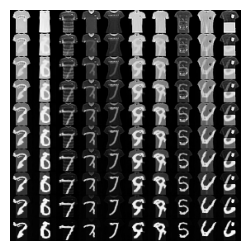

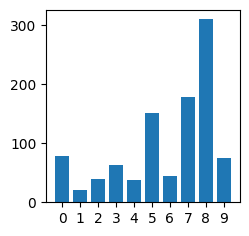

In [141]:
from utils import plot_image_evolution, mnist_classifier

c = 0
plot_image_evolution(pipeline[c])
mnist_classifier(pipeline[c], plot_histogram=True)


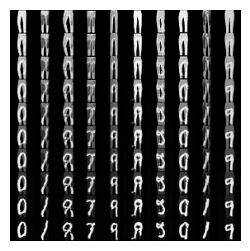

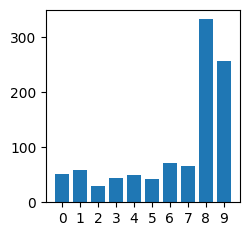

In [143]:
c = 1
plot_image_evolution(pipeline[c])
mnist_classifier(pipeline[c], plot_histogram=True)

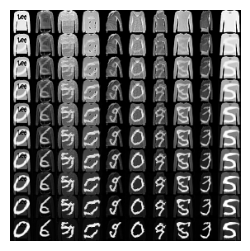

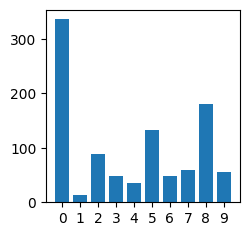

In [144]:
c = 2
plot_image_evolution(pipeline[c])
mnist_classifier(pipeline[c], plot_histogram=True)

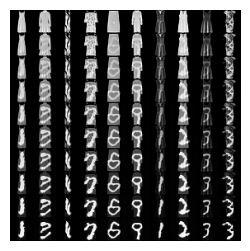

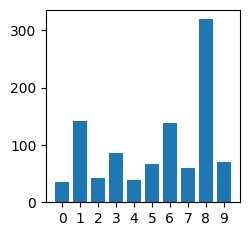

In [145]:
c = 3
plot_image_evolution(pipeline[c])
mnist_classifier(pipeline[c], plot_histogram=True)

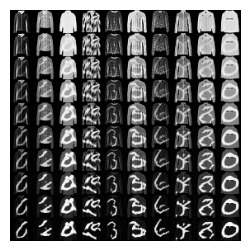

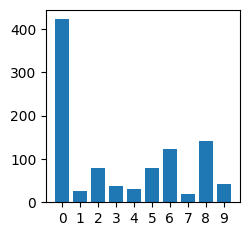

In [146]:
c = 4
plot_image_evolution(pipeline[c])
mnist_classifier(pipeline[c], plot_histogram=True)

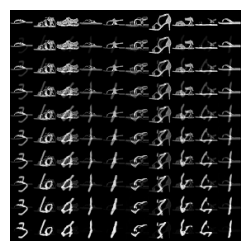

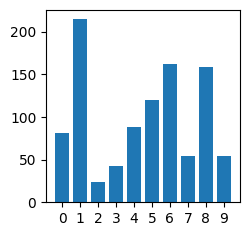

In [147]:
c = 5
plot_image_evolution(pipeline[c])
mnist_classifier(pipeline[c], plot_histogram=True)

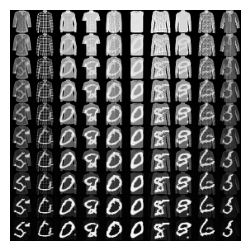

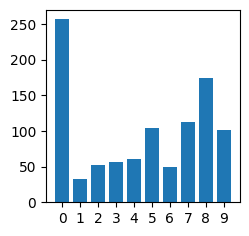

In [148]:
c = 6
plot_image_evolution(pipeline[c])
mnist_classifier(pipeline[c], plot_histogram=True)

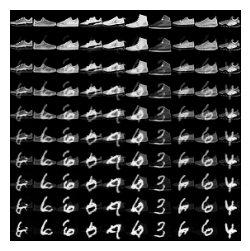

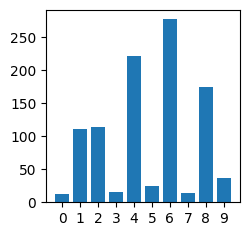

In [149]:
c = 7
plot_image_evolution(pipeline[c])
mnist_classifier(pipeline[c], plot_histogram=True)

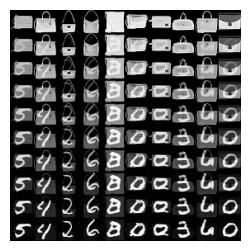

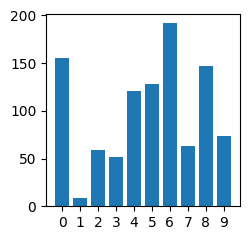

In [150]:
c = 8
plot_image_evolution(pipeline[c])
mnist_classifier(pipeline[c], plot_histogram=True)

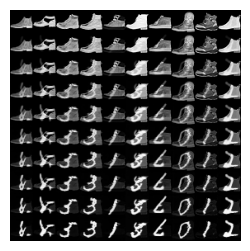

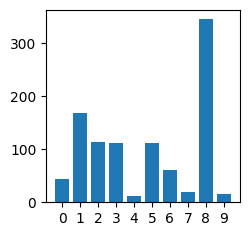

In [152]:
c = 9
plot_image_evolution(pipeline[c])
mnist_classifier(pipeline[c], plot_histogram=True)

### Out-of-distribution samples

In [ ]:
import torch
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 
from torchvision import transforms
from torchvision.datasets import EMNIST

emnist_test = EMNIST(root='../../data', split='letters', train=False, download=True, transform=transforms.ToTensor())
emnist_test = emnist_test.data.unsqueeze(1).float() / 255.0

pipeline_ood = FlowMatchPipeline(trained_model=cfm, 
                                    num_sampling_steps=100,
                                    configs=config)
pipeline_ood.generate_samples(input_source=emnist_test[:100])

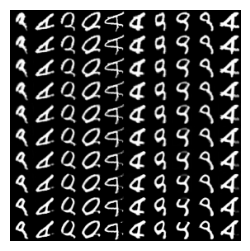

In [168]:
plot_image_evolution(pipeline_ood, nrow=10, figsize=(3, 3))
